# UVP projektna naloga

## Analiza nakaterih osnovnih podatkov o avomobilih
#### Luka Urbanč

V projektni nalogi analiziram in prikazem nekaj povezav med podatki, ki sem jih pridobil iz spletnih strani. Preden se lotimo analize, bi naprej postavil nekaj hipotez glede podatkov: 
 - povprecna cena bo okoli 40000eur
 - najvec bo motorjev s stirimi cilindi
 - hitrejsi avti bodo drazji
 - najbolj pogosta prostornina bo manjsa ali enaka dvem litrom
 - najboljs pogosto stevilo prestav bo 6
 - vecina avtov bo imela le predni pogon


### Naprej je potrebno pridobiti podatke s spletne strani. To storimo tako, da poženemo program *main.py* in sledimo navodilom v njemu. 
Ko smo to opravili se lahko lotimo nase analize podatkov.
Naprej nalozimo podatke iz .csv datoteke, ki jo je ustvaril main.py. Poglejmo, kako izgleda sploh izgleda nasa datoteka in katere podatke imamo na voljo. Se pred tem se splaca uvoziti vse, kar potrebujemo za delo:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 

podatki_o_avtih = pd.read_csv("data.csv")
podatki_o_avtih.head()

,Id,Price (EUR),Transmission,Number of Gears,Body Type,Number of seats,Drive wheel,Fuel Type,Number of Cylinders,Volume of engine,Power,Max Torque,Top Speed,Acceleration to 100km/h,Combined consumption l/100km
0,1,23200,5 speed manual transmission,5,"3-doors, hatchback",4,front,gasoline,4,1368,135,206,205.0,7.9,6.5
1,2,25500,5 speed manual transmission,5,"3-doors, convertible",4,front,gasoline,4,1368,135,206,205.0,7.9,6.5
2,4,21990,6 speed manual transmission,6,"3-doors, hatchback",4,front,gasoline,4,1368,155,201,208.0,8.2,6.9
3,5,24545,6 speed manual transmission,6,"3-doors, hatchback",4,front,gasoline,4,1368,165,250,213.0,7.9,6.0
4,7,30000,5 speed manual transmission,5,"5-doors, station wagon",5,front,gasoline,4,1970,165,206,220.0,8.2,8.9


Seveda nas najprej zanima, koliko podatkov sploh imamo na voljo. Število unikatnih avtomobilov, za katere imamo podatke je enostavno dobiti, stevilo podatkov pa je zmnozek stevila vrstic in stevila stolpcev. Dolžina naše .csv datoteke je:

In [21]:
print(len(podatki_o_avtih.index))

48


Skupno stevilo podatkov pa je:

In [20]:
print(f"Skupaj imamo torej {len(podatki_o_avtih) * len(podatki_o_avtih.index)} podatkov")

Skupaj imamo torej 2304 podatkov


## Vizualizacija podatkov iz datoteke
Preden se lotimo analize, se splaca vizualizirati vse podatke, ki jih imamo na volje, da bolje razumemo, kako so ti med sabo povezani in kaksni sploh so.
V ta namen si poglejmo graficne prikaze za podatke in njihove lastnosti.

Zacnimo s ceno avtomobilov:

Povprecna cena avtomobila je tako 22362.4, EUR


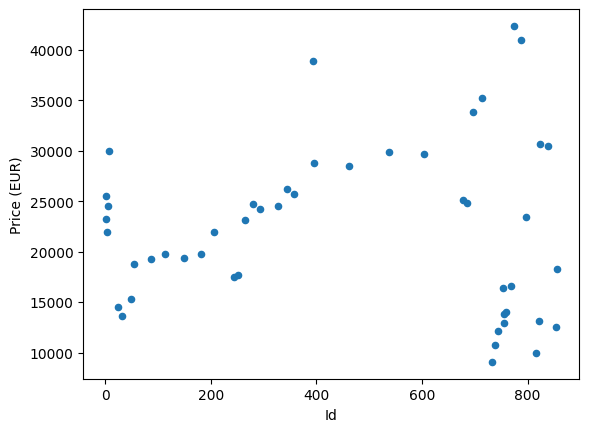

In [32]:
podatki_o_avtih.plot.scatter(x="Id", y="Price (EUR)")
print(f"Povprecna cena avtomobila je tako {round(podatki_o_avtih["Price (EUR)"].mean(), 2)}, EUR")

Narisemo se grafe za ostale smislene parametre:

<Axes: ylabel='Transmission'>

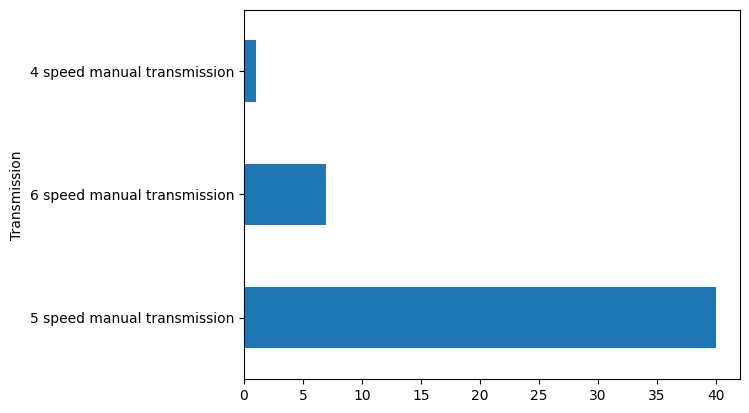

In [49]:
transmission = podatki_o_avtih["Transmission"].value_counts()
transmission.plot.barh()

Average: 5.12
Max: 6


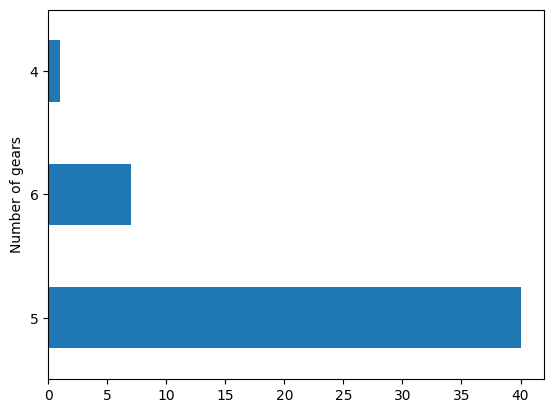

In [51]:
prestave = podatki_o_avtih["Number of gears"].value_counts()
prestave.plot.barh()
print(f"Average: {round(podatki_o_avtih["Number of gears"].mean(), 2)}")
print(f"Max: {podatki_o_avtih["Number of gears"].max()}")

<Axes: ylabel='Body Type'>

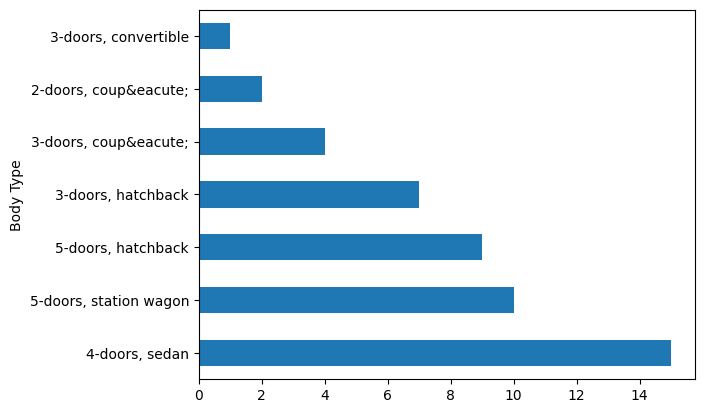

In [41]:
oblika = podatki_o_avtih["Body Type"].value_counts()
oblika.plot.barh()

Opala! Opazili smo napako pri zajemu podatkov. Oblika "coup&eacute" verjetno ni pravilno izpisana, zato jo bomo zamenjali s "coupe"

<Axes: ylabel='Body Type'>

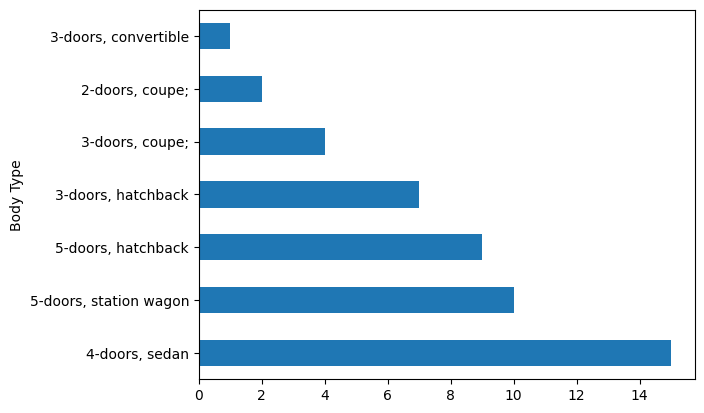

In [43]:
podatki_o_avtih["Body Type"] = podatki_o_avtih["Body Type"].str.replace("coup&eacute", "coupe")
oblika = podatki_o_avtih["Body Type"].value_counts()
oblika.plot.barh()

Tezava uspesno odpravljena! Upamo, da je to edin lapsus v podatkih.

Average: 4.83
Max: 5


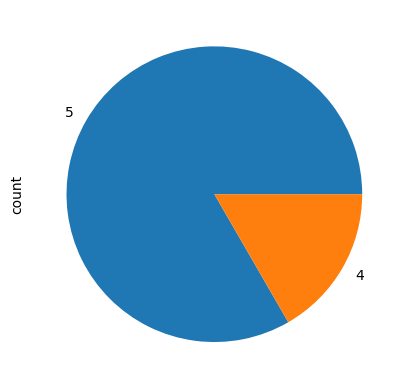

In [53]:
sedezi = podatki_o_avtih["Number of seats"].value_counts()
sedezi.plot.pie()
print(f"Average: {round(podatki_o_avtih["Number of seats"].mean(), 2)}")
print(f"Max: {podatki_o_avtih["Number of seats"].max()}")

<Axes: ylabel='count'>

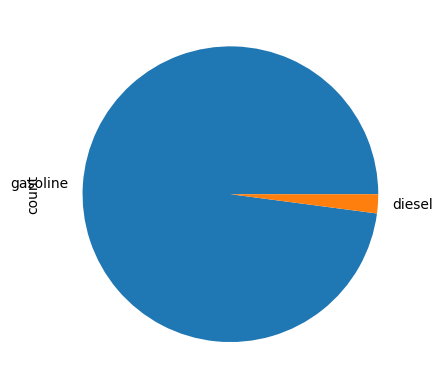

In [17]:
fuel = podatki_o_avtih["Fuel Type"].value_counts()
fuel.plot.pie()

<Axes: ylabel='count'>

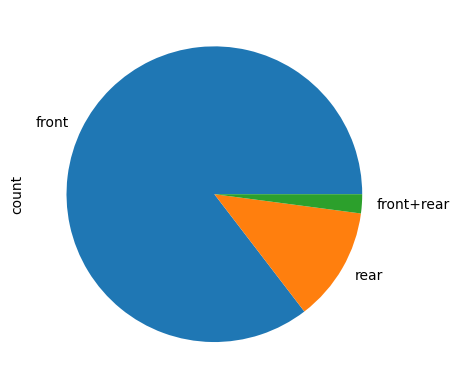

In [20]:
drive = podatki_o_avtih["Drive wheel"].value_counts()
drive.plot.pie()

Average: 4.0
Max: 4


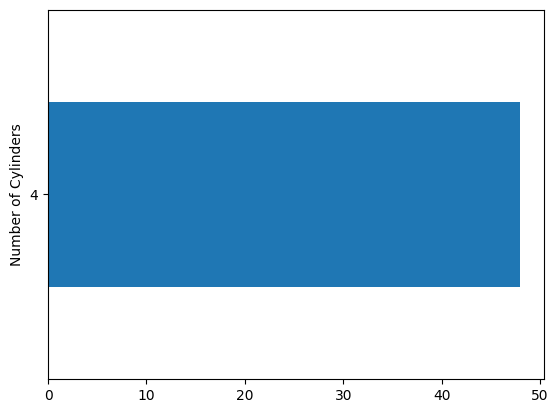

In [54]:
cyl = podatki_o_avtih["Number of Cylinders"].value_counts()
cyl.plot.barh()
print(f"Average: {round(podatki_o_avtih["Number of Cylinders"].mean(), 2)}")
print(f"Max: {podatki_o_avtih["Number of Cylinders"].max()}")

Average: 1630.46
Max: 2198


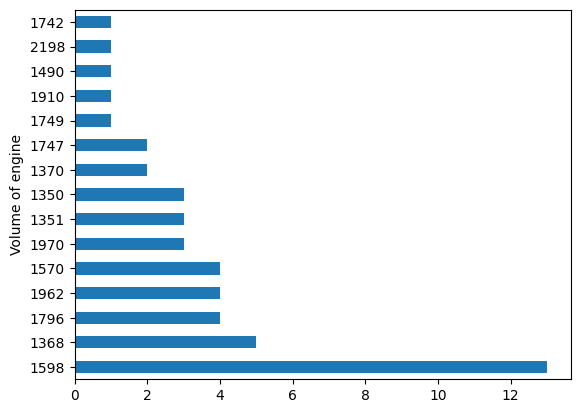

In [55]:
vol = podatki_o_avtih["Volume of engine"].value_counts()
vol.plot.barh()
print(f"Average: {round(podatki_o_avtih["Volume of engine"].mean(), 2)}")
print(f"Max: {podatki_o_avtih["Volume of engine"].max()}")

Average: 123.79
Max: 200


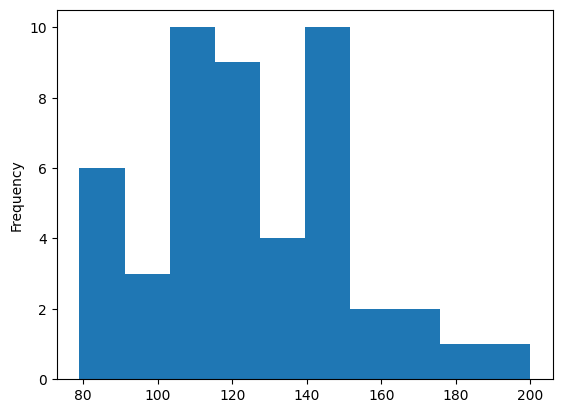

In [56]:
moc = podatki_o_avtih["Power"]
moc.plot.hist()
print(f"Average: {round(podatki_o_avtih["Power"].mean(), 2)}")
print(f"Max: {podatki_o_avtih["Power"].max()}")

Average: 164.27
Max: 320


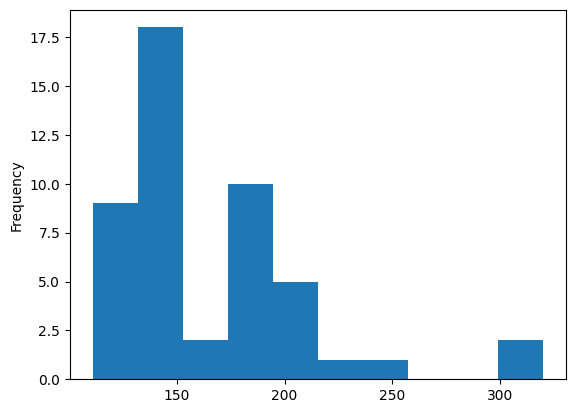

In [57]:
navor = podatki_o_avtih["Max Torque"]
navor.plot.hist()
print(f"Average: {round(podatki_o_avtih["Max Torque"].mean(), 2)}")
print(f"Max: {podatki_o_avtih["Max Torque"].max()}")

Average: 194.31
Max: 232.0


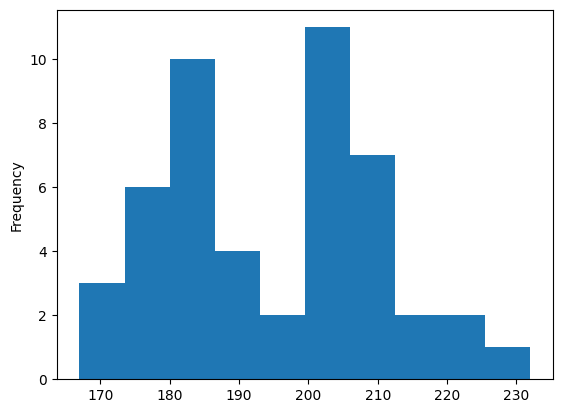

In [59]:
hitrost = podatki_o_avtih["Top Speed"]
hitrost.plot.hist()
print(f"Average: {round(podatki_o_avtih["Top Speed"].mean(), 2)}")
print(f"Max: {podatki_o_avtih["Top Speed"].max()}")

Average: 10.41
Min: 7.7


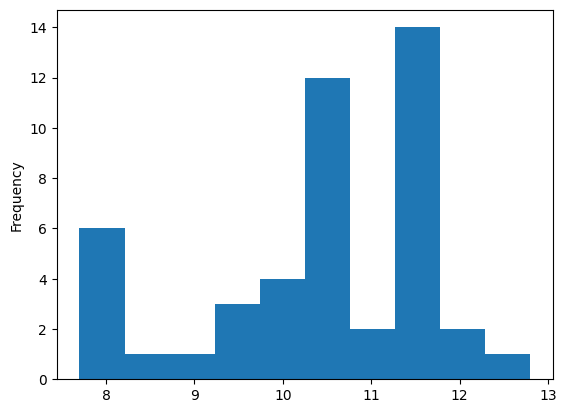

In [60]:
pospesek = podatki_o_avtih["Acceleration to 100km/h"]
pospesek.plot.hist()
print(f"Average: {round(podatki_o_avtih["Acceleration to 100km/h"].mean(), 2)}")
print(f"Min: {podatki_o_avtih["Acceleration to 100km/h"].min()}")

Average: 8.16
min: 6.0


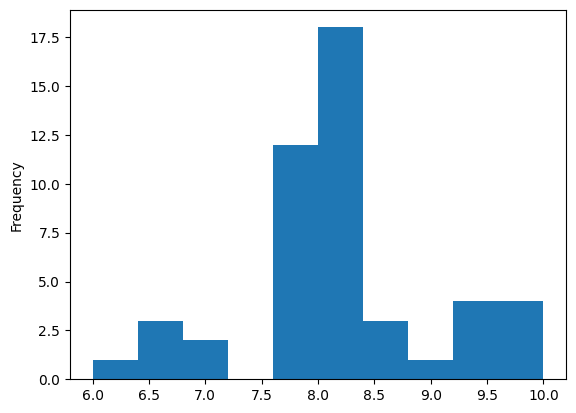

In [62]:
poraba = podatki_o_avtih["Combined consumption l/100km"]
poraba.plot.hist()
print(f"Average: {round(podatki_o_avtih["Combined consumption l/100km"].mean(), 2)}")
print(f"min: {podatki_o_avtih["Combined consumption l/100km"].min()}")

## Najbolj pogost avto
Z danimi podatki lahko sestavimo tudi "Najbolj pogost avto", tako da za njegove lastnosti vzamemo najbolj pogosto v vsaki kategoriji, pri stevilcnih kategorijah pa jemljemo povprecja.

In [64]:
sez = []
for element in list(podatki_o_avtih.columns):
    try:
        var = podatki_o_avtih[element].value_counts().index[0]
    except:
        var = podatki_o_avtih[element].median()
    print(f"{element}: {var}")
    sez.append(var)

Id: 1
Price (EUR): 23200
Transmission: 5 speed manual transmission
Number of gears: 5
Body Type: 4-doors, sedan
Number of seats: 5
Drive wheel: front
Fuel Type: gasoline
Number of Cylinders: 4
Volume of engine: 1598
Power: 120
Max Torque: 140
Top Speed: 185.0
Acceleration to 100km/h: 11.3
Combined consumption l/100km: 8.2
False


Ali pa opbstaja tak avto, ki bi ustrezal vsem tem zahtevam?

In [65]:
print((podatki_o_avtih == sez).all(1).any())

False


Ocitno ne, morda pa je vas avto blizu tega. Osebno vem, da se VW Golf od teh zahtev ne loci zelo veliko, verjetno pa to velja za vecino avtomobilov (po konstrukciji).

### Korelacije med vsemi parametri
Seveda nas zanima tudi, kako sprememba enega parameta vpliva na spremembo drugega. V namen boljsega razumevanja teh odnosov, si narisemo se korelacijsko matriko, ki ima na *i,j-tem* mestu koeficient korelacije med parametrom v vrstici i in parametrom v stoplcu j. Koeficient korelacije je stevilo med -1 in 1, ki nam opisuje, kako povezani stva dve spremenljivki. 1 pomeni, da se druga pri spremembi prve prav tako enako spremeni, -1 pa se obratno spreminja. 0 pomeni, da ni nekaga vzorca - enkrat se spreminja skupaj, drugic pada, tretjic se ne spremeni sploh. Ocitno bo taka matrika enaka svoji transponiranki, po diagonali bodo pa same enke. Tako matriko se vedno splaca tudi ustrezno pobarvati, zato da hitro opazimo kaksne zanimive povezave. To lahko pocnemo le z numericnimi podatki, zato izlocimo ostale, ki so tipa "string"

Text(0.5, 1.0, 'Korelacijska matrika za podatke o avtomobilih')

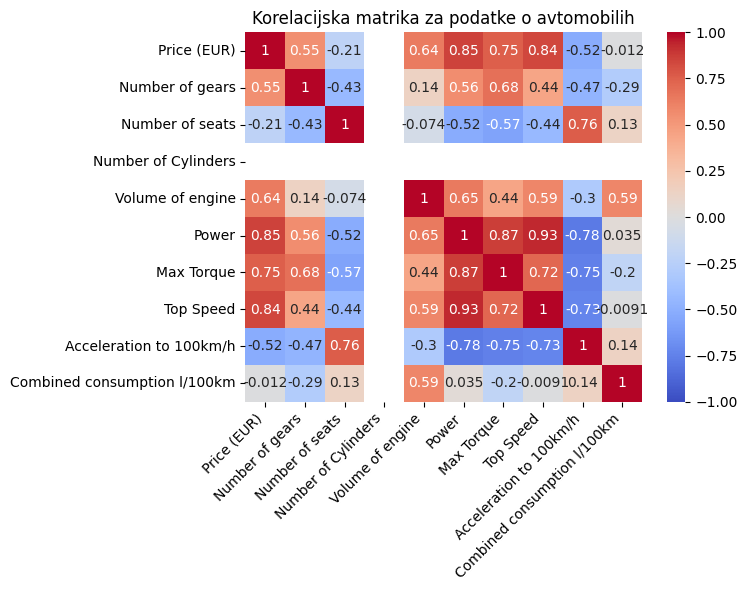

In [67]:
numeric_values = podatki_o_avtih.select_dtypes(include=np.number)
numeric_values =numeric_values.drop("Id", axis="columns")
matrix = numeric_values.corr()
sns.heatmap(matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(rotation=45, ha="right")
plt.title("Korelacijska matrika za podatke o avtomobilih")


Opazimo lahko mocno povezavo med ceno in najvisjo hitrostjo ter med ceno in pospeskom do 100km/h. Ta povezava ni presenetljiva, saj so bolj zmogljivi avotomobili navadno drazji. Opazimo lahko tudi, da vec sedezev v avtomobilu vecinoma pomeni tudi pocasnejsi pospesek do 100km/. To nas seveda ne preseneca, saj je avto z vecimi sedezi obicajno tezji. Zanimivo se mi zdi, da poraba avtomobila prakticno nima nobene korelacije z ostalimi spremenljivami, razen volumnom motorja. 

Sedaj se lahko vrnemo tudi na zacetne hipoteze in preverimo njihovo veljavnost.


## Raziskovanje podatkov

Lotimo se raziskovanja nasih podatko. Ali gorivo vpliva na moc? Kaj pa na navor in pospesek? Kako se cena kaze v hitrosti? Obstoj taksnih in drugacnih povezav med podatki bomo raziskali v spodnjem predelu.

Najprej si poglejmo enostavne povezve glede cene. Ali cena vpliva na:
 - hitrost
 - moc
 - stevilo cilindrov
 - stevilo sedezev
Jasno bi bilo, da do drazji avti hitrejsi in mocnejsi. Pricakovali bi tudi, da bi se s ceno nekako vecalo tudi stevilo cilindrov, stevilo sedezev pa bi se manjsalo, saj so dragi sportniki ponavadi misljeni za le eno do dve osebi. Odgovore na vsa to vprasanja bomo enostavno poisakali v zgornji korelacijski matriki, bolj nazorno odvisnost parametrov pa bomo dobili preko graficnih prikazev. 

<Axes: xlabel='Price (EUR)', ylabel='Number of seats'>

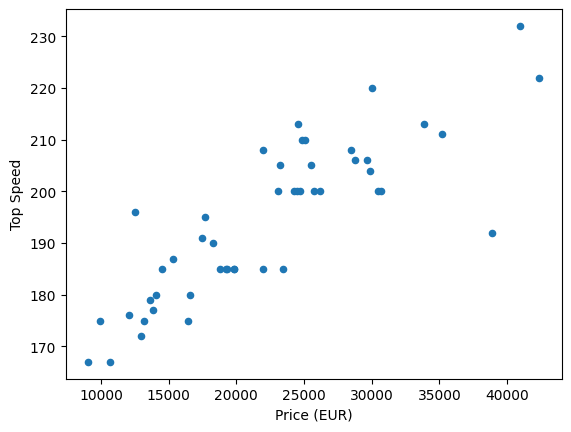

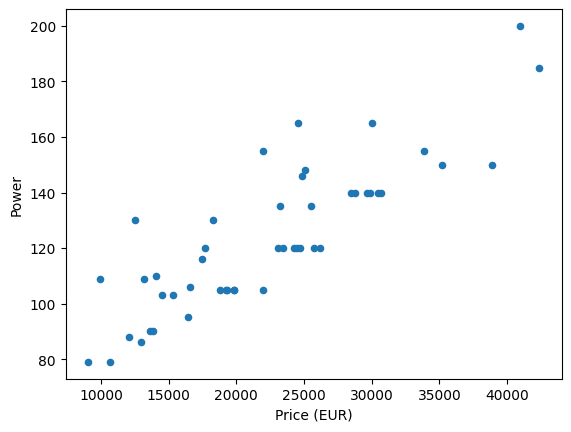

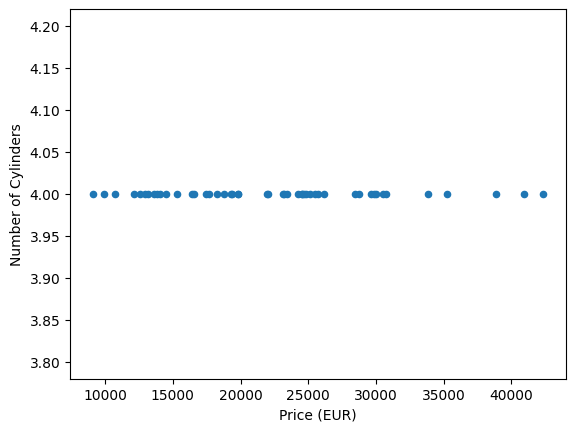

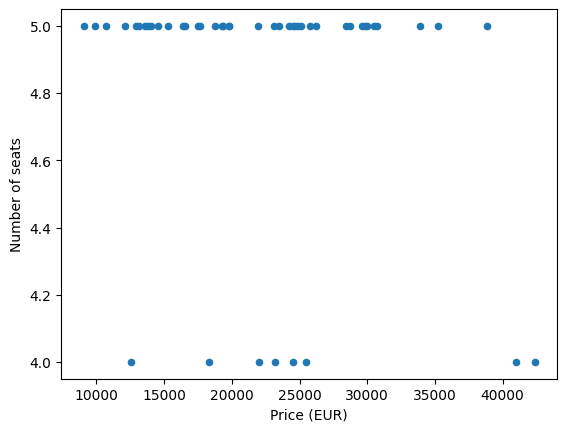

In [69]:
podatki_o_avtih.plot.scatter(x="Price (EUR)", y="Top Speed")
podatki_o_avtih.plot.scatter(x="Price (EUR)", y="Power")
podatki_o_avtih.plot.scatter(x="Price (EUR)", y="Number of Cylinders")
podatki_o_avtih.plot.scatter(x="Price (EUR)", y="Number of seats")


Opazimo, da med ceno in mocjo ter med ceno in najvisjo hitrostjo obstaja povezava, za katero si zelo zelimo da bi bila linearna. Poglejmo kako bi izgledal grafa, ce bi narisali se najboljso premico cez tocke:

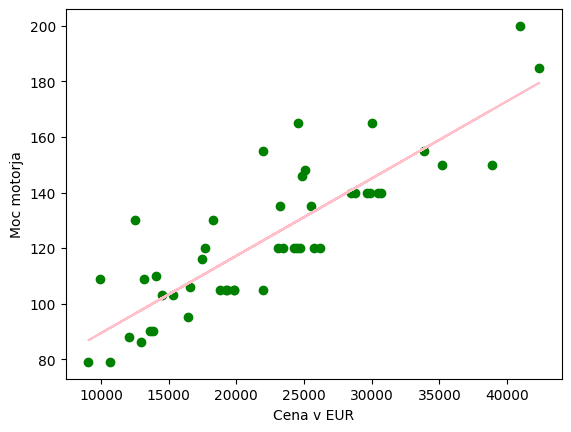

In [75]:
X = podatki_o_avtih["Price (EUR)"]
Y = podatki_o_avtih["Power"]

coefficients = np.polyfit(X, Y, 1)
poly = np.poly1d(coefficients)

plt.scatter(X, Y, color="green")
plt.plot(X, poly(X), color="pink", label="Best fit")
plt.xlabel("Cena v EUR")
plt.ylabel("Moc motorja")
plt.show()

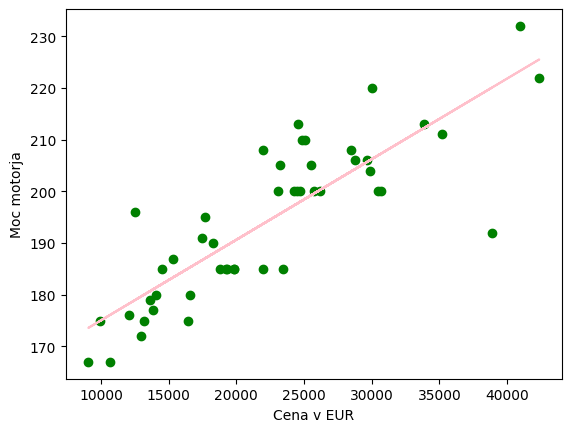

In [74]:
X = podatki_o_avtih["Price (EUR)"]
Y = podatki_o_avtih["Top Speed"]

coefficients = np.polyfit(X, Y, 1)
poly = np.poly1d(coefficients)

plt.scatter(X, Y, color="green")
plt.plot(X, poly(X), color="pink", label="Best fit")
plt.xlabel("Cena v EUR")
plt.ylabel("Moc motorja")
plt.show()

Te rezultati nas tako navdusijo, da se odlocimo povecati obseg nase raziskave! Po kratkem premisleku se odlocimo, da si podrobneje pogledamo tudi vpliv prostornine in stevila cilindrov na porabo avtomobila. Kmecka pamet bi nam namigovala, da bodo vecji motorji porabili vec goriva.

<Axes: xlabel='Number of Cylinders', ylabel='Combined consumption l/100km'>

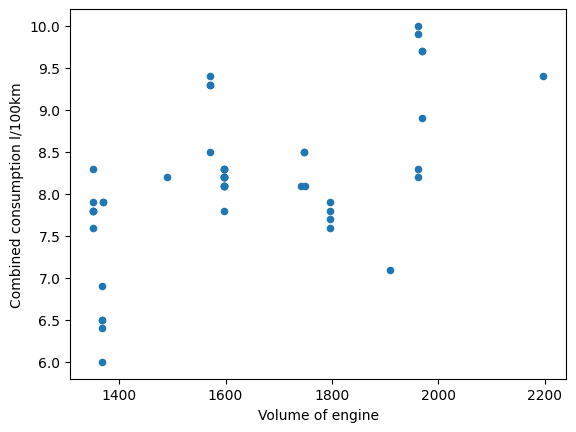

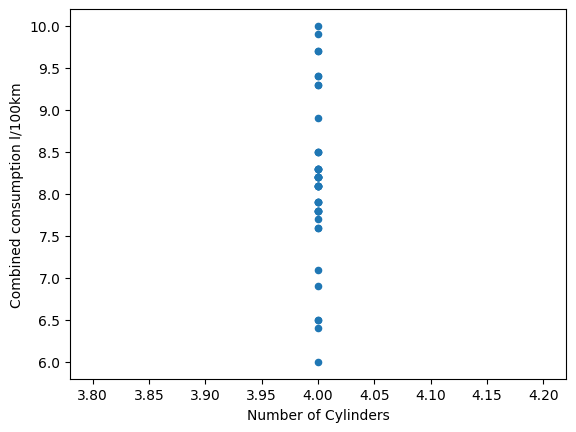

In [79]:
podatki_o_avtih.plot.scatter(x="Volume of engine", y="Combined consumption l/100km")
podatki_o_avtih.plot.scatter(x="Number of Cylinders", y="Combined consumption l/100km")

Tukaj zal ne opazimo nobenih zanimivih povezav, zato nam motivacija malenkost pade.

Zanima nas tudi, kako bi lahko moc in navor vplivala na pospeske avtomobilov, zato si narisemo se dva grafa in si ju podrobno ogledamo:

<Axes: xlabel='Max Torque', ylabel='Acceleration to 100km/h'>

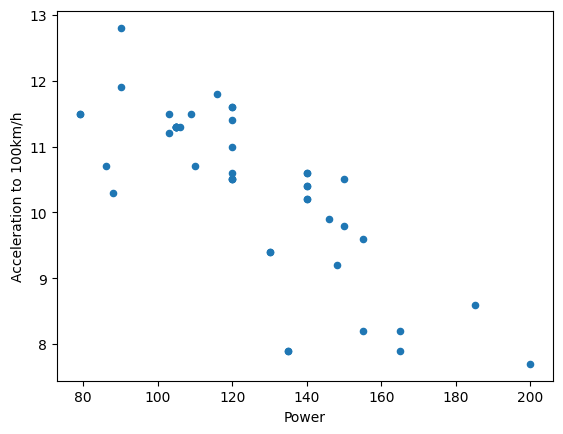

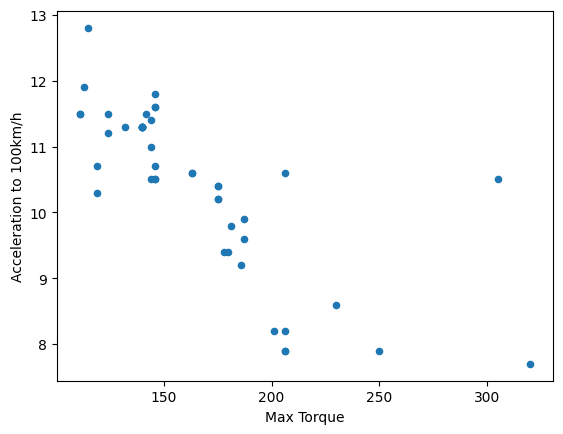

In [81]:
podatki_o_avtih.plot.scatter(x="Power", y="Acceleration to 100km/h")
podatki_o_avtih.plot.scatter(x="Max Torque", y="Acceleration to 100km/h")

Spet opazimo moznost linearnih povezah! Narisemo se premice skozi tocke, da se o odvisnosti dodobro prepricamo

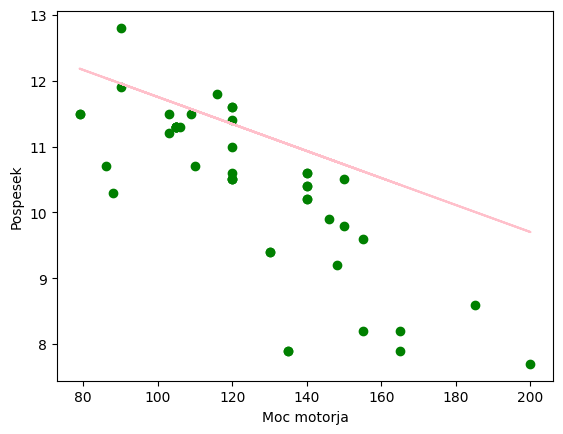

In [27]:
dropped = podatki_o_avtih.dropna()
X = dropped["Power"]
Y = dropped["Acceleration to 100km/h"]
coefficients = np.polyfit(X, Y, deg=1)

plt.scatter(X, Y, color="green")
plt.plot(X, poly(X), color="pink", label="Best fit")
plt.xlabel("Moc motorja")
plt.ylabel("Pospesek")
plt.show()

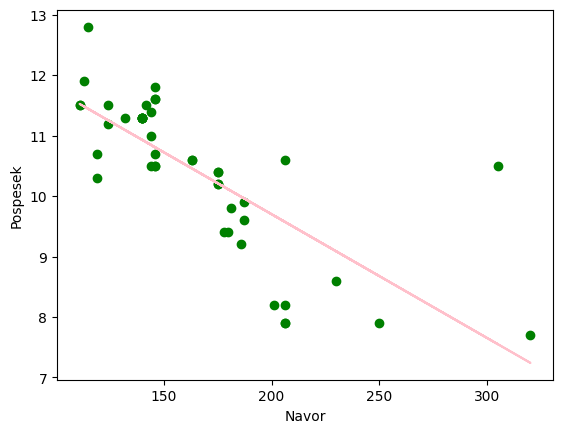

In [26]:
dropped = podatki_o_avtih.dropna()
X = dropped["Max Torque"]
Y = dropped["Acceleration to 100km/h"]
coefficients = np.polyfit(X, Y, deg=1)
poly = np.poly1d(coefficients)

plt.scatter(X, Y, color="green")
plt.plot(X, poly(X), color="pink", label="Best fit")
plt.xlabel("Navor")
plt.ylabel("Pospesek")
plt.show()

Povezave izgledajo dobro, zato se nam veselje do dela spet dvigne na rekordne nivoje. 
Do zdaj smo ugotovili ze veliko zanimivih, cetudi ne presnetljivih povezav med podatki v nasi tabeli. Kot pravi avtomobilski navdusenci pa nas seveda zanima tudi, kaksen avto ima najboljso razmerje med mocjo in ceno. Pa poglejmo, kako bi to izgledalo:

In [20]:
temp = podatki_o_avtih.copy()
temp["Kvocient moci in cene"] = podatki_o_avtih["Power"]/podatki_o_avtih["Price (EUR)"]
podatki_o_avtih.iloc[[temp["Kvocient moci in cene"].idxmax()]]


,Id,Price (EUR),Transmission,Number of Gears,Body Type,Number of seats,Drive wheel,Fuel Type,Number of Cylinders,Volume of engine,Power,Max Torque,Top Speed,Acceleration to 100km/h,Combined consumption l/100km
42,816,9906,4 speed manual transmission,4,"4-doors, sedan",5,rear,gasoline,4,1570,109,142,175.0,NaN,9.3


Ampak zlomka, saj ne vemo sploh kateri avto to je. Ne moremo namrec priti k prodajalcu in reci, da si zelimo avto, ki bo imel tocno te lastnosti. Imamo pa njegov Id, kar nam omogoca, da povezemo podatke z njegovo spletno stranjo. Pa storimo tocno to. Najprej si poglejmo kako sploh izgleda nasa pomozna datoteka, nato pa povezimo Id z dobljenim:

In [4]:
meta = pd.read_csv("auxillary.csv")
meta.head()

,Id,Name,Url
0,1,abarth-500-1-4-16v-t-jet,https://www.cars-data.com/en/abarth-500-1-4-16...
1,2,abarth-500c-1-4-16v-t-jet,https://www.cars-data.com/en/abarth-500c-1-4-1...
2,4,abarth-grande-punto-1-4-t-jet-16v,https://www.cars-data.com/en/abarth-grande-pun...
3,5,abarth-punto-evo-1-4-t-jet-16v,https://www.cars-data.com/en/abarth-punto-evo-...
4,7,alfa-romeo-145-1-4-i-e-basis,https://www.cars-data.com/en/alfa-romeo-145-1-...


Ocitno nasa pomozna datoteka vsebuje id, ime avtomobila in njegovo spletno stran. Ker je ime nemogoce pravilno izlusciti, bo najbolje, da si poiscemo spletno stran avtomobila.

In [19]:
meta.loc[meta["Id"] == 816].iloc[0]["Url"]

'https://www.cars-data.com/en/alfa-romeo-giulietta-1-6-specs/816/tech'

Krasno. Poskali smo avto, ki nam da najvec konjskih moci glede na njegovo ceno. Zanimivo je, da je to cenejsi avto z malo moci. Konec koncev smo avtomobilski navdusenci, zato nas zainmajo le najhitrejsi in najmocnejsi, ti pa so na zalost tudi navadno najdrazji. Te dobimo na sledec nacin, enako kot zgoraj pa dobimo tudi url.

In [33]:
najhitrejsi = podatki_o_avtih["Acceleration to 100km/h"].idxmin()
podatki_o_avtih.iloc[najhitrejsi, :]


Id                                                      787
Price (EUR)                                           40950
Transmission                    6 speed manual transmission
Number of Gears                                           6
Body Type                             3-doors, coup&eacute;
Number of seats                                           4
Drive wheel                                           front
Fuel Type                                          gasoline
Number of Cylinders                                       4
Volume of engine                                       1742
Power                                                   200
Max Torque                                              320
Top Speed                                             232.0
Acceleration to 100km/h                                 7.7
Combined consumption l/100km                            8.1
Name: 40, dtype: object

In [36]:
najhitrejsi_id = podatki_o_avtih.iloc[najhitrejsi, :].iloc[0]
meta.loc[meta["Id"] == najhitrejsi_id].iloc[0]["Url"]

'https://www.cars-data.com/en/alfa-romeo-brera-1750-turbo-specs/787/tech'

In [29]:
najmocnejsi = podatki_o_avtih["Power"].idxmax()
podatki_o_avtih.iloc[najmocnejsi, :]

Id                                                      787
Price (EUR)                                           40950
Transmission                    6 speed manual transmission
Number of Gears                                           6
Body Type                             3-doors, coup&eacute;
Number of seats                                           4
Drive wheel                                           front
Fuel Type                                          gasoline
Number of Cylinders                                       4
Volume of engine                                       1742
Power                                                   200
Max Torque                                              320
Top Speed                                             232.0
Acceleration to 100km/h                                 7.7
Combined consumption l/100km                            8.1
Name: 40, dtype: object

In [37]:
najmocnejsi_id = podatki_o_avtih.iloc[najmocnejsi, :].iloc[0]
meta.loc[meta["Id"] == najmocnejsi_id].iloc[0]["Url"]

'https://www.cars-data.com/en/alfa-romeo-brera-1750-turbo-specs/787/tech'